# 激活函数
关于这部分可参阅该[网页](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 线性函数
$$
y = ax + b
$$

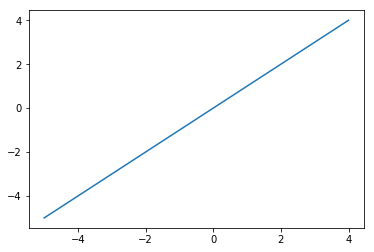

In [2]:
x = np.arange(-5,5)
y = x
plt.plot(x,y)

## Sigmoid函数
$$
y = s(x) = \frac{1}{1+e^{-ax}}
$$
优点：
* 输出映射到\[0,1\]，函数单调连续，且输出范围有限制，优化稳定
* 易于求导
* 输出值为独立概率，可以用在输出层    

缺点：
* 函数容易饱和，导致训练结果不佳
* 其输出值不是零均值，数据存在偏差，分布不平均

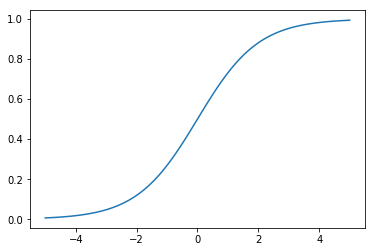

In [3]:
x = np.linspace(-5,5,num=100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

## 双曲正切函数
$$
y = \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
优点：
* tanh归一化到\[-1,1\]
* 收敛速度比sigmoid更快，更易于训练
* 其输出以0为中心，数据分布平均

缺点：
* 没有改变sigmoid函数由于饱和性引起的梯度消失问题

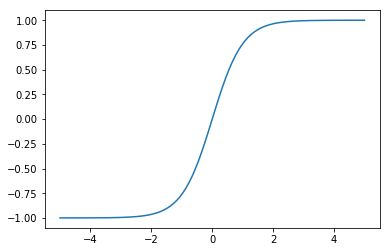

In [4]:
x = np.linspace(-5,5,num=100)
y = np.tanh(x)
plt.plot(x, y)

## ReLU函数
大脑同时被激活的神经元只有1%~4%，这表明神经元工作的稀疏性。从信号方面看，神经元同时只对输入信号的少部分进行选择响应，大量信号被刻意屏蔽，这样可以提高神经网络的学习精度，更好提取稀疏特征。
<br/>
ReLU则满足仿生学的稀疏性，只有当输入值高于一定数目时，才激活该神经元节点。当输入值低于0时进行限制，当输入值上升到一阈值时，函数中的自变量与因变量呈线性关系。
<br/>
$$
ReLU: 
R(z) = \left\{ \begin{array}{l}
z\\
0
\end{array} \right.\left. \begin{array}{l}
{\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} z > 0\\
{\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} z <  = 0
\end{array} \right\}
\\
LeakyReLU: \quad R(z) = \left\{ \begin{array}{l}
z\\
\alpha {\kern 1pt} z{\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} {\kern 1pt} 
\end{array} \right.\left. \begin{array}{l}
z > 0\\
z <  = 0
\end{array} \right\}
$$
ReLU函数对比sigmoid函数主要变化有：
* 单侧抑制
* 相对宽阔的兴奋边界
* 稀疏激活性

优点：
* 相比sigmoid函数和tanh函数，ReLU函数在随机梯度下降算法中能够快速收敛
* ReLU函数的梯度为0或者常数，可以缓解梯度消散问题
* 引入稀疏激活性，因此无监督预训练时也能有较好的表现

缺点：
* ReLU神经元在训练中不可逆地死亡
* 随着训练进行，可能会出现神经元死亡、权重无法更新，流经神经元的梯度从该点开始将永远是零

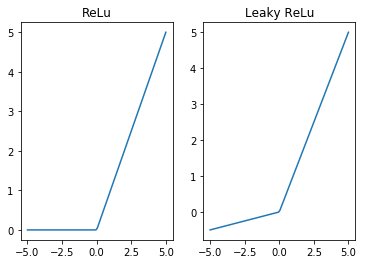

In [5]:
x = np.linspace(-5,5,100)
y = np.maximum(x,0)
plt.subplot(1,2,1)
plt.title("ReLu")
plt.plot(x,y)


x1 = x[np.where(x>0)]
x2 = x[np.where(x<=0)]
y = np.append(0.1*x2, x1)
plt.subplot(1,2,2)
plt.title("Leaky ReLu")
plt.plot(x, y)


plt.show()

## Softmax函数
Softmax函数的本质是将一个K维的任意实数向量，压缩（映射）成另一个K维的实数向量，其中向量中的每个元素取指都介于（0,1）范围内。
<br/>
Softmax是对逻辑回归（Logistic Regression, LR）的推广，逻辑回归用于处理二分类问题，其推广Softmax回归则用于处理多分类问题。如下图示，在数学上，Softmax函数会返回输出类的互斥概率分布，例如，网络的输出为（1,1,1,1），经过Softmax函数后输出为（0.25,0.25,0.25,0.25）。我们可以得到分类中唯一所属类别，因此通常把Softmax作为输出层的激活函数。
$$
softmax(x) = \frac{e^{x_j}}{\sum_{k=1}^{K}e^{x_k}}
$$

下面进一步举例说明。假设有一个多分类问题，但是我们只关心这些类别的最高得分的概率，那么会使用一个带有最大似然估计函数的Softmax输出层来获得所有类比输出概率的最大值。例如神经网络的分类有3个，分别为“野马”“河马”“斑马”，使用softmax作为输出层的激活函数最后只能得到一个最大的分类概率如野马（0.6），河马（0.1），斑马（0.3），其中最大值野马（0.6）。
<br/>
如果要求每次的输出都可以获得多个分类，例如希望神经网络的预测输出既像“河马”也像“野马”，那么我们不希望Softmax作为输出层，这里可以使用Sigmoid函数作为输出层的激活函数更合适，因为Sigmoid函数可以为每个类别的输出提供独立的概率。
<br/>

Reference:
* [Softmax Function wiki](https://en.wikipedia.org/wiki/Softmax_function)
* [Classification and Loss Evaluation - Softmax and Cross Entropy Loss](https://deepnotes.io/softmax-crossentropy)
* [Word2Vec介绍：softmax函数的python实现](https://zhuanlan.zhihu.com/p/28991249)

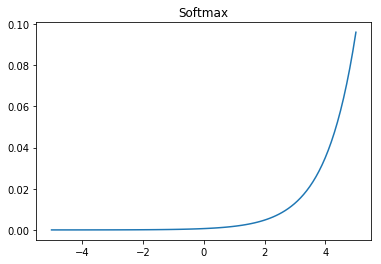

In [6]:
x = np.linspace(-5,5,100)
y = np.exp(x)/sum(np.exp(x))
plt.title("Softmax")
plt.plot(x,y)

## 激活函数的选择
在选择激活函数时，一般隐层选择Leaky ReLU函数会得到较为理想的效果。
<br/>
使用Sigmoid函数作为隐层激活函数，但注意不要使用太多的隐层。
<br/>
可以使用tanh函数代替Sigmoid函数观察模型的精确率曲线图。
<br/>
使用ReLU函数作为激活函数，注意梯度下降算法的学习率参数$\eta$不能设置过高，避免神经元大量“消亡”。
<br/>
对于输出层，一般使用Softmax函数获得同分布最高概率作为输出结果
<br/>
此外，可以加入Bath Normalization(BN)层，让下一层的输入数据具有相同的分布。如果遇到神经网络训练时收敛速度慢，或梯度爆炸或者梯度消失等无法训练的状况都可以尝试加入BN层，然后观察其训练结果。